In [20]:
import sys
import os
sys.path.append('../src')
from fsm import gspan_to_igraph
import numpy as np
import igraph as ig
import networkx as nx

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
with open('../data/fsm/subgraphs/graph.gspan.fp', 'r') as f:
    gspan = f.read()

In [22]:
graphs = gspan_to_igraph(gspan)

In [23]:
motif_matrix = np.zeros((len(graphs), 30))
lines = gspan.split('\n')
i = 0
for line in lines:
    if line.startswith('x'):
        for x in line.split(' ')[1:]:
            if x:
                motif_matrix[i, int(x)] = 1
        i += 1

In [24]:
pca = PCA(n_components=2)
# pca = TSNE(n_components=2, perplexity=15, random_state=69)
x = pca.fit_transform(motif_matrix.T)

In [25]:
data_path = '../data/hashtags/edges/'
edge_files = [file for file in os.listdir(data_path) if file.endswith('.txt')]

In [26]:
def categorize_hashtags(names):
    """Categorizes hashtags into predefined categories."""
    categories = {
        'Shared interest/subculture': [
            'anime', 'booktok', 'football', 'gym', 'jazz',
            'kpop', 'lgbt', 'makeup', 'minecraft', 'plantsoftiktok'
        ],
        'Political discussion': [
            'biden2024', 'blacklivesmatter', 'climatechange', 'conspiracy',
            'election', 'gaza', 'israel', 'maga', 'palestine', 'trump2024'
        ],
        'Entertainment/knowledge': [
            'asmr', 'challenge', 'comedy', 'learnontiktok', 'movie',
            'news', 'science', 'storytime', 'tiktoknews', 'watermelon'
        ],
        'Random Graphs': [f'G_random_{i}' for i in range(8)]
    }

    name_to_category = {name: category for category, tags in categories.items() for name in tags}
    return [name_to_category.get(name, 'Unknown') for name in names]

Text(0, 0.5, 'PC2')

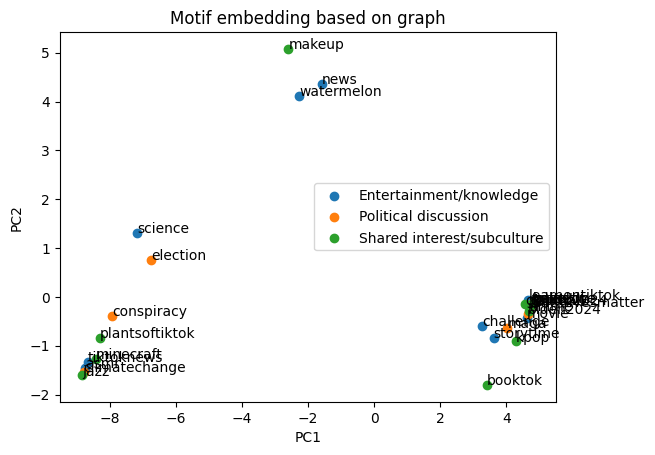

In [29]:
fig, ax = plt.subplots()

labels = np.array([categorize_hashtags([file.split('_')[0]])[0] for file in edge_files])
for label in np.unique(labels):
    idx = np.where(labels == label)
    ax.scatter(x[idx, 0], x[idx, 1], label=label)

for i, txt in enumerate(edge_files):
    ax.annotate(txt.split('_')[0], (x[i, 0], x[i, 1]))

ax.legend()
ax.set_title('Motif embedding based on graph')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [28]:
pca.explained_variance_ratio_.sum()

np.float64(0.8435916050322617)

In [98]:
labels[17]

np.str_('science')

In [77]:
labels = np.array([file.split('_')[0] for i, file in enumerate(edge_files)])

In [71]:
asdf = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        # cosine similarity
        if i == j:
            asdf[i, j] = 0
            continue
        asdf[i, j] = np.dot(motif_matrix[:, i], motif_matrix[:, j]) / (np.linalg.norm(motif_matrix[:, i]) * np.linalg.norm(motif_matrix[:, j]))

In [99]:
labels[15]

np.str_('watermelon')

In [95]:
labels[np.argmax(asdf[15])]

np.str_('makeup')

In [101]:
np.max(asdf[15])

np.float64(0.7488502514048628)

In [100]:
asdf[15, 17]

np.float64(0.5829286622243913)